In [1]:
%pylab inline
import pandas as pd
pd.set_option('display.precision', 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotEffect(df,margin=0.5):
    fig,axes = plt.subplots(1,df.index.size,sharey=True)
    fig.set_size_inches(df.index.size*1.5,2)
    for i in arange(df.index.size):
        ax = axes[i]
        ax.plot(df.columns,df.ix[i,:],'o-')
        ax.set_xlim(0.7,3.3)
        ax.set_ylim(df.min().min()-margin,df.max().max()+margin)
        ax.set_title(df.index[i])
        ax.set_xticks([1,2,3])
    print "\n効果図"
    plt.tight_layout()
    plt.show()

## 5ヶ月目 - 問1
>風速計用プロペラの最適設計をするために、A~Hの制御因子(略)を取り上げて実験した。<br>
信号因子Mとして風速を
$$M_1=0.9, M_2=1.8, M_3=2.7 (m/s)$$
誤差因子Nを$N_1,N_2$として回転数yをデータとして、y=$\beta{M}$に対するSN比と感度を求めた。<br>
わりつけおよびSN比$\eta$と感度S, 補助表(水準別平均)は以下のよう(略)である。

###1) SN比の最適条件を指摘しSN比を推定せよ。当初案がA1B2C1D1E2F2G3H1であるとき、利得を推定せよ。


標準SN比の水準別平均
       1      2      3
A   0.68  17.66    NaN
B   3.44  10.94  13.13
C   9.79   6.05  11.66
D   7.97   6.68  12.86
E  12.90   8.45   6.16
F  15.26   6.81   5.44
G   6.23  11.36   9.92
H   9.04  12.60   5.88

効果図


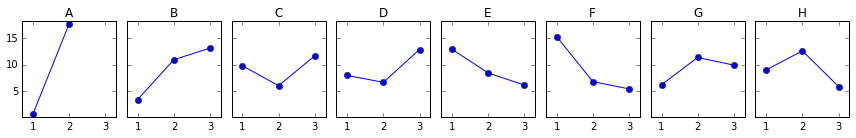

In [3]:
SNave = pd.DataFrame([[0.68,17.66,nan],
                      [3.44,10.94,13.13],
                      [9.79,6.05,11.66],
                      [7.97,6.68,12.86],
                      [12.90,8.45,6.16],
                      [15.26,6.81,5.44],
                      [6.23,11.36,9.92],
                      [9.04,12.60,5.88]],
                     index=list("ABCDEFGH"),
                     columns=["1","2","3"])
print "\n標準SN比の水準別平均\n",SNave
plotEffect(SNave)

最適条件はA2B3C3D3E1F1G2H2。

In [4]:
ave = SNave.sum(1)[0]/2
eta_opt = SNave.ix["A","2"]+SNave.ix["B","3"]+SNave.ix["C","3"]+SNave.ix["D","3"]\
+SNave.ix["E","1"]+SNave.ix["F","1"]+SNave.ix["G","2"]+SNave.ix["H","2"]-7*ave
eta_ini = SNave.ix["A","1"]+SNave.ix["B","2"]+SNave.ix["C","1"]+SNave.ix["D","1"]\
+SNave.ix["E","2"]+SNave.ix["F","2"]+SNave.ix["G","3"]+SNave.ix["H","1"]-7*ave
eta_diff = eta_opt-eta_ini
print "最適条件のSN比は、%.2f(db)"%eta_opt
print "現行条件のSN比は、%.2f(db)"%eta_ini
print "\n利得は、%.2f(db)。真数に直すと、%d。"%(eta_diff, 10**(eta_diff/10))

最適条件のSN比は、43.24(db)
現行条件のSN比は、-0.59(db)

利得は、43.83(db)。真数に直すと、24154。


###2)最適設計のプロペラを用いた風速計の誤差範囲を求めよ。

テキストのeq(9.8)より、誤差範囲は
$$\pm\frac{3}{\sqrt{\eta(真数)}}$$
したがって、

In [5]:
print "\n誤差範囲は+-%.3f\n"%(3/np.sqrt(10**(eta_diff/10)))


誤差範囲は+-0.019



In [6]:
%load_ext version_information
%version_information numpy, matplotlib, pandas, ipython, version_information

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
IPython 3.0.0-dev
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.10.0.dev+a02f5c8
matplotlib 1.4.2
pandas 0.16.0
ipython 3.0.0.dev0
version_information 1.0.3
Sun Jul 26 17:00:31 2015 JST